In [109]:
import cv2
import numpy as np
import joblib



In [110]:
not_detect_imgs = []
corners_dict = {}
for idx in range(1,26): # testing to see which images can't be detected
    img = cv2.imread(f"img{idx}.jpg")
    img = np.uint8(img)
    gray_scaled_img = cv2.cvtColor(img, cv2.COLOR_HSV2BGR)

    ans, corners= cv2.findChessboardCorners(gray_scaled_img, patternSize= (9,6))
    if ans is False:
        not_detect_imgs.append(idx)
    else:
        corners_dict[idx] = corners
    #print(len(corners))
    
    
    #print(corners)
    # x = corners[0][0]
    # y = corners[0][1]
    # print(f"x: {x}, y: {y}")
    # print("ans", ans)
    # print('corner:', corners)
    # print('------------')

# print(not_detect_imgs)
# print(corners_dict)

print(not_detect_imgs)

[1, 4, 5, 6, 10, 12, 13, 19, 20]


In [111]:

for corners in corners_dict.values():
    for coords in corners: #2621. 2016.5
        #print(i[0])
        x = coords[0][0]
        y = coords[0][1]
        print(x,y)
        center = (int(x), int(y))
        print(center)
        break

544.97595 316.93356
(544, 316)
610.4357 336.41296
(610, 336)
602.717 356.7525
(602, 356)
627.7335 378.20477
(627, 378)
608.5 427.0
(608, 427)
601.5 171.5
(601, 171)
551.50494 238.26869
(551, 238)
558.17255 157.28372
(558, 157)
704.89825 227.15437
(704, 227)
703.5418 299.07608
(703, 299)
610.5784 289.06122
(610, 289)
551.0498 374.34402
(551, 374)
555.0785 355.52313
(555, 355)
519.7551 392.36423
(519, 392)
637.2728 403.72522
(637, 403)
641.91614 278.5898
(641, 278)


In [112]:
for i in corners_dict.values(): # checking amount of corners in img2
    print(len(i))

54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54


In [113]:

# square_size = 0.02 #2 cm
# obj_pts = np.zeros((9*6, 3), np.float32)
# obj_pts[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) * square_size


# all_obj_pts = []
# all_img_pts = []

# auto_only_imgs = []

# manual_only_imgs = []

# def click_event(event, x, y, flags, param):
#     current_img = param['img']
#     current_name = param['name']
#     if event == cv2.EVENT_LBUTTONDBLCLK:
#         print(x,y) # coordinate
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         cv2.putText(current_img, f'{x}, {y}', (x,y), font, 1, (255,0,0), 2)
#         cv2.imshow(window_name, current_img)
#         param['point'].append([x,y])
    
#     if event == cv2.EVENT_RBUTTONDBLCLK:
#         print(x,y)
#         font = cv2.FONT_HERSHEY_SIMPLEX
#         b,g,r = current_img[y,x] 
#         cv2.putText(img,f'{b}, {g}, {r}', (x,y), font, 1, (255, 255,0), 2)
#         cv2.imshow(window_name, current_img)
#         #points += [x,y]

#     print(f"Manual Points: {param['point']}")



# # linear interpolation
# def linear_interpolation(pts, pattern_size):
#     tl, tr, br, bl = np.array(pts[0],dtype = 'float32'),  np.array(pts[1],dtype = 'float32'), np.array(pts[2],dtype = 'float32'), np.array(pts[3],dtype = 'float32')
#     #print(type(tl))
#     cols, rows = pattern_size
#     print(cols)
#     grid = []
#     for row in range(rows):
#         ver_int = row / (rows - 1)
#         row_start = (1 - ver_int) * tl + ver_int * bl
#         row_end = (1 - ver_int)*  tr + ver_int * br
        
#         for col in range(cols):
#             hor_int = col / (cols -1)
#             point = (1 - hor_int) * row_start + hor_int * row_end
#             grid.append(point)
#     return np.array(grid, dtype= 'float32').reshape(-1, 1, 2)

# pattern_size = (9,6)

# window_name = 'chessboard_tool'
# all_result = {}
# # read input image
# for idx in range(1,26):

#     img = cv2.imread(f'img{idx}.jpg')

# # convert the input image to a grayscale
#     gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#     # Find the chess board corners
#     ret, corners = cv2.findChessboardCorners(gray, (9,6),None)
#     print(corners)
#     # if chessboard corners are detected
#     if ret == True:
    
#         # Draw and display the corners
#         img = cv2.drawChessboardCorners(img, (9,6), corners,ret)
#         all_img_pts.append(corners)
#         auto_only_imgs.append(corners)
#         all_obj_pts.append(obj_pts)

#         cv2.imshow(window_name,img)
#         cv2.waitKey(0)

#     elif ret == False:
#         # clicking (TL -> TR -> BR -> BL)
#         manual_pts = []
#         cv2.imshow(window_name, img)
#         cv2.setMouseCallback(window_name, click_event, param= {'img': img, 'name': f'Image{idx},', 'point':manual_pts})
#         cv2.waitKey(0)

#         if len(manual_pts) == 4:
#             interpolated_corners = linear_interpolation(manual_pts, (9,6))
#             all_img_pts.append(interpolated_corners)
#             manual_only_imgs.append(interpolated_corners)
#             all_obj_pts.append(obj_pts)

#             img_vis = img.copy()
#             cv2.drawChessboardCorners(img_vis, (9,6), interpolated_corners, True)
#             cv2.imshow(window_name, img_vis)
#             print("Showing interpolated grid. Press any key to continue to next image.")
#             cv2.waitKey(0) # Wait again so you can actually see the result
        
#         else:
#             print(f"Warning: Only {len(manual_pts)} points clicked. Skipping image {idx}.")
    
# cv2.destroyWindow(window_name)



In [114]:
square_size = 0.02 #2 cm
obj_pts = np.zeros((9*6, 3), np.float32) # create a 
obj_pts[:, :2] = np.mgrid[0:9, 0:6].T.reshape(-1, 2) * square_size
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [115]:
# # save the result
# all_obj_pts = joblib.dump(all_obj_pts, 'obj_points.joblib')
# all_img_pts = joblib.dump(all_img_pts, 'img_points.joblib')
# auto_only_imgs = joblib.dump(auto_only_imgs, 'auto_points.joblib')
# manual_only_imgs = joblib.dump(manual_only_imgs, 'manual_points.joblib')


In [116]:
#print(manual_only_imgs)

all_obj_pts = joblib.load('obj_points.joblib')
all_img_pts = joblib.load('img_points.joblib')
auto_only_imgs = joblib.load('auto_points.joblib')
manual_only_imgs = joblib.load('manual_points.joblib')

print(len(all_obj_pts))

def calibrate(object_list, img_list, gray_img):

    ret, matrix, distort, rvecs, tvec = cv2.calibrateCamera(object_list, img_list, gray_img, None, None, flags = 0)

    return ret, matrix, distort, rvecs, tvec

#Run 1: All Images
object_list_run1 = [obj_pts] * len(all_img_pts)
ret1, matrix1, distort1, rvecs1, tvec1 = calibrate(object_list_run1, all_img_pts, gray.shape[::-1] )

#Run 2: Only Five images each
run2_imgs = auto_only_imgs[:5] + manual_only_imgs[:5]

object_10 = [obj_pts]*10

ret2, matrix2, distort2, rvecs2, tvec2 = calibrate(object_10, run2_imgs, gray.shape[::-1] )

#Run 3: Automatic 5 images

run3_imgs = auto_only_imgs[:5] 

object_5_3 = [obj_pts]*5

ret3, matrix3, distort3, rvecs3, tvec3 = calibrate(object_5_3, run3_imgs, gray.shape[::-1] )


#rt_total = [(rvecs1, tvec1, 'Run 1'), (rvecs2, tvec2, 'Run2'), (rvecs3, tvec3, 'Run 3')]
runs = [(matrix1, distort1, "Run 1"), (matrix2, distort2, "Run 2"), (matrix3, distort3, "Run 3")]

25


In [125]:
axis = np.float32([[0.06, 0 ,0], [0, 0.06, 0], [0, 0,-0.06]]).reshape(-1,3)
#print(rt_total)
#cube: 8 corners

s = 0.02

cube_points = np.float32([[0,0,0], [s,0,0], [s,s,0], [0,s,0], [0,0,-s], [s,0,-s], [s,s,-s], [0,s,-s]])

for matrix, distort, label in runs:
    test_img = cv2.imread('test3.jpg')
    print(test_img)
    test_gray = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
    
    ret_test, test_corners = cv2.findChessboardCorners(test_gray, (9,6), None)
    origin_pixel = tuple(test_corners[0].ravel().astype(int))

    ret, rvec, tvec= cv2.solvePnP(obj_pts, test_corners, matrix, distort)

    #We want to project the axis onto image
    imgpoints_axis, _ = cv2.projectPoints(axis, rvec, tvec, matrix, distort)

    imgpoints_cube, _ = cv2.projectPoints(cube_points, rvec, tvec, matrix, distort)
    #print('imgpoints_cube:', imgpoints_cube)
    # Convert projected points to integers for drawing
    axis_pix = imgpoints_axis.reshape(-1, 2).astype(int)
    cube_pix = imgpoints_cube.reshape(-1, 2).astype(int)
    #print('cube_pix:', cube_pix)


    # create polygon
    R, _ = cv2.Rodrigues(rvec) #convert rvec into rMatrix return(Rotation_matrix, Jaccobian)
    print(f'Rogrigeus', R) # R determines how the chesboard is rotated relative to camera
    top_center_3d = np.float32([[s/2, s/2, -s]]) #3d coord

    center_pt,_ = cv2.projectPoints(top_center_3d, rvec, tvec, matrix, distort)
    
    center_pixel = tuple(center_pt.reshape(-1,2)[0].ravel().astype(int))
    
    cam_pt = np.dot(R, top_center_3d.T) + tvec

    cam_distance = np.linalg.norm(cam_pt)

    #color intensity(V value)
    col_intes = 255 - ((min(cam_distance, 4) /4) * 255 )
    
    # orientation tilt (H value)
    theta_rad = np.arccos(abs(R[2, 2])) * (180 / np.pi) # angles 
    rot_intes = 179 - (min(theta_rad, 45)/45) * 179

    # saturation 
    satur = 255

    # convert HSV to BGR
    small_array = np.array([[[rot_intes, satur, col_intes]]], dtype= np.uint8)
    bgr_col = cv2.cvtColor(small_array, cv2.COLOR_HSV2BGR)
    b_val = int(bgr_col[0][0][0])
    g_val = int(bgr_col[0][0][1])
    r_val = int(bgr_col[0][0][2])

    
    top_plane_pts = cube_pix[4:8]
    #print(3, top_plane_pts)
    #print(top_plane_pts)
    cv2.fillConvexPoly(img = test_img, points= top_plane_pts, color = (b_val, g_val,  r_val))
    
    # print(f'center_pixel: {center_pixel}')
    # print(f'top center point of the polygon is: {center_pt}')
    cv2.circle(test_img, center_pixel, 5, (0,0,255), 1)
    
    
    # print(f'cam_pt:{cam_pt}')
    # print(f'cam_distance: {cam_distance}')


    # Draw 3 axies
    x_pt = tuple(axis_pix[0])
    cv2.line(test_img, origin_pixel, tuple(axis_pix[0]), (0, 0, 255 ), 5) # x axis
    cv2.putText(test_img, f'X', (x_pt[0]+10, x_pt[1]),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

    y_pt = tuple(axis_pix[1])
    cv2.line(test_img, origin_pixel, tuple(axis_pix[1]), (0, 255, 0), 5) #y 
    cv2.putText(test_img, f'Y', (y_pt[0]+10, y_pt[1]),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

    z_pt = tuple(axis_pix[2])
    cv2.line(test_img, origin_pixel, tuple(axis_pix[2]), (255, 0, 0), 5)#z
    cv2.putText(test_img, f'Z', (z_pt[0]+10, z_pt[1]),  cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)

    
    #  pillars of the cube
    cv2.line(test_img, tuple(cube_pix[0]), tuple(cube_pix[4]), (0, 0, 0), 2) 
    cv2.line(test_img, tuple(cube_pix[1]), tuple(cube_pix[5]), (0, 0, 0), 2)
    cv2.line(test_img, tuple(cube_pix[2]), tuple(cube_pix[6]), (0, 0, 0), 2)
    cv2.line(test_img, tuple(cube_pix[3]), tuple(cube_pix[7]), (0, 0, 0), 2)

    #connect the corners
    cv2.polylines(test_img, [cube_pix[0:4]], True, (0, 0, 0), 2)
    cv2.polylines(test_img, [cube_pix[4:8]], True, (0, 0, 0), 2)

    # use circle to represent the center of pixel
    cv2.circle(test_img, center_pixel, 5, (0, 0, 255), -1) 
    cv2.putText(test_img, f"{cam_distance:.2f}m", center_pixel, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)



    cv2.imshow(f'chessboard_window: {label}', test_img)
    cv2.waitKey(0)
    cv2.destroyWindow(f'chessboard_window: {label}')

[[[ 66  42  52]
  [ 68  47  56]
  [ 68  47  56]
  ...
  [255 232 214]
  [255 233 215]
  [255 234 216]]

 [[ 64  43  52]
  [ 68  47  56]
  [ 67  46  55]
  ...
  [255 232 214]
  [255 233 215]
  [255 234 216]]

 [[ 65  44  53]
  [ 68  47  56]
  [ 67  45  57]
  ...
  [255 231 211]
  [255 232 212]
  [255 233 213]]

 ...

 [[ 67  49  62]
  [ 63  46  59]
  [ 61  44  58]
  ...
  [142 134 134]
  [143 135 135]
  [144 136 136]]

 [[ 66  48  61]
  [ 64  45  60]
  [ 61  44  58]
  ...
  [142 134 134]
  [143 135 135]
  [144 136 136]]

 [[ 64  45  60]
  [ 63  44  59]
  [ 62  45  59]
  ...
  [142 134 134]
  [144 136 136]
  [144 136 136]]]
Rogrigeus [[ 0.09204888 -0.99154024  0.09151482]
 [ 0.80474569  0.0199504  -0.59328438]
 [ 0.58643957  0.12825732  0.79977415]]
[[[ 66  42  52]
  [ 68  47  56]
  [ 68  47  56]
  ...
  [255 232 214]
  [255 233 215]
  [255 234 216]]

 [[ 64  43  52]
  [ 68  47  56]
  [ 67  46  55]
  ...
  [255 232 214]
  [255 233 215]
  [255 234 216]]

 [[ 65  44  53]
  [ 68  47  56]
  

Draw a polygon that covers the top side of the cube (check the fillConvexPoly function). Place a dot in the center of the top plane and add a text that shows the distance of this point to the camera, in meters. The color of the top side polygon should change with the postion and orientation of the center of the top plane, relative to the camera. Use only 3D-coordinates and extrinsics.

Choice 1

In [127]:
matrix, distort = matrix3, distort3
capture = cv2.VideoCapture(0)

while True:
    ret_cap, frame = capture.read()
    if not ret_cap:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (9,6), None)

    if ret:
        criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
        cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        ret, rvec, tvec= cv2.solvePnP(obj_pts, corners, matrix, distort)

        imgpoints_axis, _ = cv2.projectPoints(axis, rvec, tvec, matrix, distort)

        imgpoints_cube, _ = cv2.projectPoints(cube_points, rvec, tvec, matrix, distort)

        axis_pix = imgpoints_axis.reshape(-1, 2).astype(int)
        cube_pix = imgpoints_cube.reshape(-1, 2).astype(int)

        # create polygon
        R, _ = cv2.Rodrigues(rvec) #convert rvec into rMatrix return(Rotation_matrix, Jaccobian)
        print(f'Rogrigeus', R) # R determines how the chesboard is rotated relative to camera
        top_center_3d = np.float32([[s/2, s/2, -s]]) #3d coord

        center_pt,_ = cv2.projectPoints(top_center_3d, rvec, tvec, matrix, distort)
        
        center_pixel = tuple(center_pt.reshape(-1,2)[0].ravel().astype(int))
        
        cam_pt = np.dot(R, top_center_3d.T) + tvec

        cam_distance = np.linalg.norm(cam_pt)

        #color intensity(V value)
        col_intes = 255 - ((min(cam_distance, 4) /4) * 255 )
        
        # orientation tilt (H value)
        theta_rad = np.arccos(abs(R[2, 2])) * (180 / np.pi) # angles 
        rot_intes = 179 - (min(theta_rad, 45)/45) * 179

        # saturation 
        satur = 255

        # convert HSV to BGR
        small_array = np.array([[[rot_intes, satur, col_intes]]], dtype= np.uint8)
        bgr_col = cv2.cvtColor(small_array, cv2.COLOR_HSV2BGR)
        b_val = int(bgr_col[0][0][0])
        g_val = int(bgr_col[0][0][1])
        r_val = int(bgr_col[0][0][2])
    
        
        top_plane_pts = cube_pix[4:8]
        #print(top_plane_pts)
        cv2.fillConvexPoly(img = frame, points= top_plane_pts, color = (b_val, g_val,  r_val))
        # top_center_3d = np.float32([[s/2, s/2, -s]]) #3d coord
        # center_pt,_ = cv2.projectPoints(top_center_3d, rvec, tvec, matrix, distort)
        # center_pixel = tuple(center_pt.reshape(-1,2)[0].ravel().astype(int))
        # print(f'center_pixel: {center_pixel}')
        # print(f'top center point of the polygon is: {center_pt}')
        cv2.circle(frame, center_pixel, 5, (0,0,255), 1)
        #distance
        
        print(f'cam_pt:{cam_pt}')
        print(f'cam_distance: {cam_distance}')


        origin_pixel = tuple(corners[0].ravel().astype(int))
        # Draw 3 axies
        x_pt = tuple(axis_pix[0])
        cv2.line(test_img, origin_pixel, tuple(axis_pix[0]), (0, 0, 255 ), 5) # x axis
        cv2.putText(test_img, f'X', (x_pt[0]+10, x_pt[1]),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

        y_pt = tuple(axis_pix[1])
        cv2.line(test_img, origin_pixel, tuple(axis_pix[1]), (0, 255, 0), 5) #y 
        cv2.putText(test_img, f'Y', (y_pt[0]+10, y_pt[1]),  cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

        z_pt = tuple(axis_pix[2])
        cv2.line(test_img, origin_pixel, tuple(axis_pix[2]), (255, 0, 0), 5)#z
        cv2.putText(test_img, f'Z', (z_pt[0]+10, z_pt[1]),  cv2.FONT_HERSHEY_SIMPLEX, 1, (255,0,0), 2)
        
        #  pillars of the cube
        cv2.line(frame, tuple(cube_pix[0]), tuple(cube_pix[4]), (0, 0, 0), 2)
        cv2.line(frame, tuple(cube_pix[1]), tuple(cube_pix[5]), (0, 0, 0), 2)
        cv2.line(frame, tuple(cube_pix[2]), tuple(cube_pix[6]), (0, 0, 0), 2)
        cv2.line(frame, tuple(cube_pix[3]), tuple(cube_pix[7]), (0, 0, 0), 2)

        #connect the corners
        cv2.polylines(frame, [cube_pix[0:4]], True, (0, 0, 0), 2)
        cv2.polylines(frame, [cube_pix[4:8]], True, (0, 0, 0), 2)

    
        cv2.circle(frame, center_pixel, 5, (0, 0, 255), -1) 
        cv2.putText(frame, f"{cam_distance:.2f}m", center_pixel, cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 2)

    cv2.imshow('Real-Time Calibration', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

capture.release()
cv2.destroyAllWindows()

        

Rogrigeus [[-0.29510429 -0.93711077  0.1863783 ]
 [ 0.71551472 -0.08747392  0.69309955]
 [-0.63320782  0.33789307  0.69633048]]
cam_pt:[[-0.10436295]
 [-0.10768464]
 [ 0.48342917]]
cam_distance: 0.5061534995282825
Rogrigeus [[-0.27513126 -0.94395616  0.18234461]
 [ 0.72763323 -0.08048719  0.68122807]
 [-0.62837303  0.32010713  0.70899842]]
cam_pt:[[-0.10146474]
 [-0.10663457]
 [ 0.48574932]]
cam_distance: 0.5075612513101099
Rogrigeus [[-0.25639468 -0.9502781   0.17672945]
 [ 0.73960514 -0.07516618  0.66883053]
 [-0.62229093  0.3021946   0.72210278]]
cam_pt:[[-0.09867557]
 [-0.10582635]
 [ 0.48689695]]
cam_distance: 0.5079416585354581
Rogrigeus [[-0.23938001 -0.95477114  0.17637823]
 [ 0.75178628 -0.06730943  0.65596253]
 [-0.61442217  0.28962306  0.73389637]]
cam_pt:[[-0.09663523]
 [-0.10510965]
 [ 0.48683589]]
cam_distance: 0.5073416916033022
Rogrigeus [[-0.23938001 -0.95477114  0.17637823]
 [ 0.75178628 -0.06730943  0.65596253]
 [-0.61442217  0.28962306  0.73389637]]
cam_pt:[[-0.0966

Choice 2

In [119]:
def calibration_quality(obj_list, img_list, revecs, tvecs, matrix, distort):
    total_error = 0
    img_errors = []

    for i in range(len(obj_list)):

        img_points_projected, _ = cv2.projectPoints(obj_list[i], revecs[i], tvecs[i], matrix, distort)

        error = cv2.norm(img_list[i], img_points_projected, cv2.NORM_L2) / len(img_points_projected)
        img_errors.append(error)

    return img_errors

In [120]:
def calibration_quality1(obj_list, img_list, error_threshold = 1):
    ret, matrix, distort, revecs, tvecs, stdint, stdExt, perViewError = cv2.calibrateCameraExtended(obj_list, img_list, gray.shape[::-1], None, None, flags = 0)
    error_dict = {}
    for i, error in enumerate(perViewError):
        label = ''
        if error >= error_threshold:
            label = 'ERROR TOO HIGH, REJECTED'
            
        else: 
            label = 'Okay!'
        #print(f"Image {i+1}: {label}")
        error_dict[f'Image {i+1}'] = label
    
    return error_dict




# calibration_quality1(all_obj_pts, all_img_pts)

In [121]:
# #Run 1: All Images
# #use retval (camera callibration)
ret1, matrix1, distort1, rvecs1, tvec1 = calibrate(all_obj_pts, all_img_pts, gray.shape[::-1] )



#Run 2: Only Five images each
run2_imgs = auto_only_imgs[:5] + manual_only_imgs[:5]

object_10 = [obj_pts]*10

ret2, matrix2, distort2, rvecs2, tvec2 = calibrate(object_10, run2_imgs, gray.shape[::-1] )

#Run 3: Automatic 5 images

run3_imgs = auto_only_imgs[:5] 

object_5_3 = [obj_pts]*5

ret3, matrix3, distort3, rvecs3, tvec3 = calibrate(object_5_3, run3_imgs, gray.shape[::-1] )

errors1 = calibration_quality1(all_obj_pts, all_img_pts)
errors2 = calibration_quality1(object_10, run2_imgs)
errors3 = calibration_quality1(object_5_3, run3_imgs)

# errors_runs = [errors1, errors2, errors3]
# #rt_total = [(rvecs1, tvec1, 'Run 1'), (rvecs2, tvec2, 'Run2'), (rvecs3, tvec3, 'Run 3')]
# runs = [(matrix1, distort1, "Run 1"), (matrix2, distort2, "Run 2"), (matrix3, distort3, "Run 3")]

Choice 6

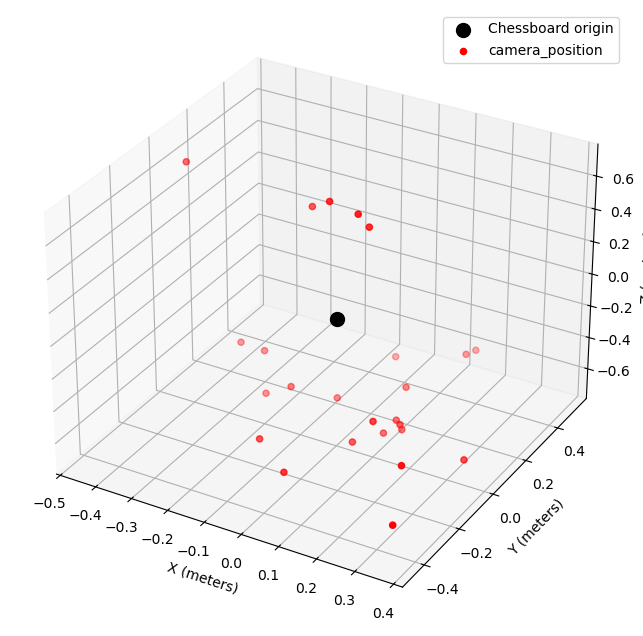

In [122]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,8))

ax = fig.add_subplot(111, projection = '3d')

ax.scatter(0,0,0, color = 'black', s = 100, label = 'Chessboard origin')

camx = []
camy = []
camz = []

for r, t in zip(rvecs1, tvec1):
    R , _ = cv2.Rodrigues(r)

    camera_position = -np.matrix(R).T * np.matrix(t)
    camx.append(camera_position[0].item())
    camy.append(camera_position[1].item())
    camz.append(camera_position[2].item())

ax.scatter(camx, camy, camz, color = 'red', label = 'camera_position')

ax.legend()
ax.set_xlabel('X (meters)')
ax.set_ylabel('Y (meters)')
ax.set_zlabel('Z (meters)')
plt.show()